In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import  AgglomerativeClustering,KMeans,DBSCAN

In [158]:
df = pd.read_excel("C:\\EastWestAirlines.xlsx", index_col=0,header=0,sheet_name=1)
df.head(29)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
6,16420,0,1,1,1,0,0,0,0,6942,0
7,84914,0,3,1,1,27482,25,0,0,6994,0
8,20856,0,1,1,1,5250,4,250,1,6938,1
9,443003,0,3,2,1,1753,43,3850,12,6948,1


In [159]:
df.shape

(3999, 11)

In [160]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [161]:
df[df.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
3393,1000,0,1,1,1,0,0,0,0,1597,0
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [162]:
df=df.drop_duplicates() 
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [163]:
df.shape

(3998, 11)

In [164]:
scaler=StandardScaler()

In [165]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) 

In [166]:
df_scaled

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [167]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


<Axes: ylabel='Frequency'>

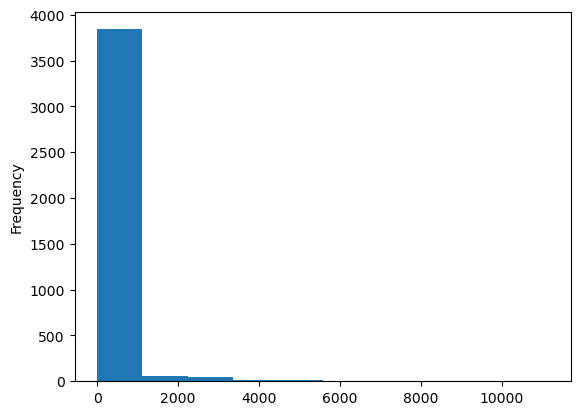

In [168]:
df.Qual_miles.plot(kind="hist")

(array([3.843e+03, 5.400e+01, 4.700e+01, 1.600e+01, 1.600e+01, 7.000e+00,
        7.000e+00, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([    0. ,  1114.8,  2229.6,  3344.4,  4459.2,  5574. ,  6688.8,
         7803.6,  8918.4, 10033.2, 11148. ]),
 <BarContainer object of 10 artists>)

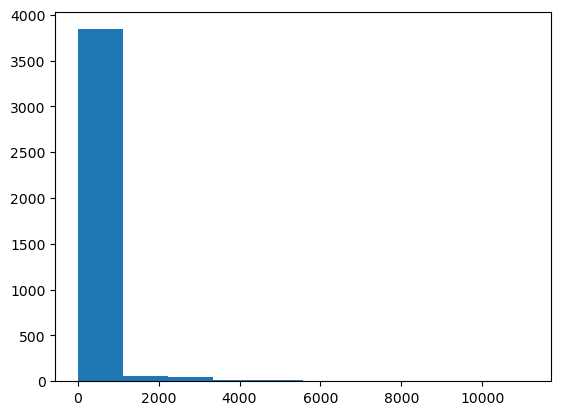

In [169]:
plt.hist(df['Qual_miles'])

{'whiskers': [<matplotlib.lines.Line2D at 0x200a2949ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x200a27ef650>,
 'boxes': [<matplotlib.lines.Line2D at 0x200a279a290>],
 'medians': [<matplotlib.lines.Line2D at 0x200a2854090>],
 'fliers': [<matplotlib.lines.Line2D at 0x200a2604650>],
 'means': []}

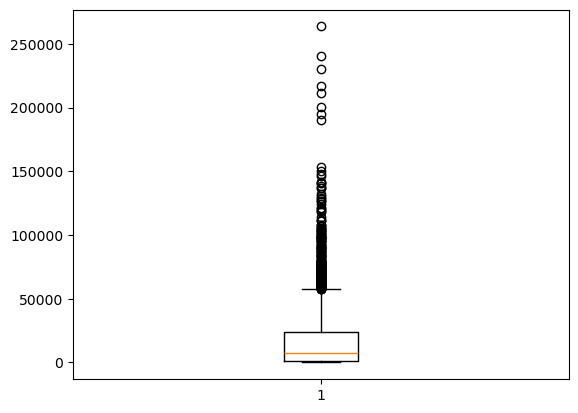

In [170]:
plt.boxplot(df['Bonus_miles'])

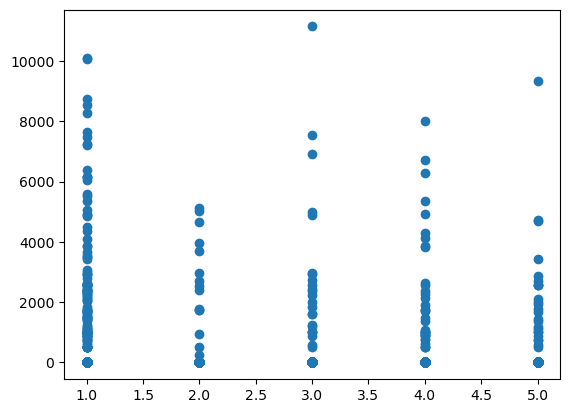

In [171]:
plt.scatter( df['cc1_miles'],df['Qual_miles'])

In [172]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


array([[<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>,
        <Axes: title={'center': 'cc1_miles'}>],
       [<Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>,
        <Axes: title={'center': 'Bonus_miles'}>],
       [<Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>,
        <Axes: title={'center': 'Flight_trans_12'}>],
       [<Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award?'}>, <Axes: >]], dtype=object)

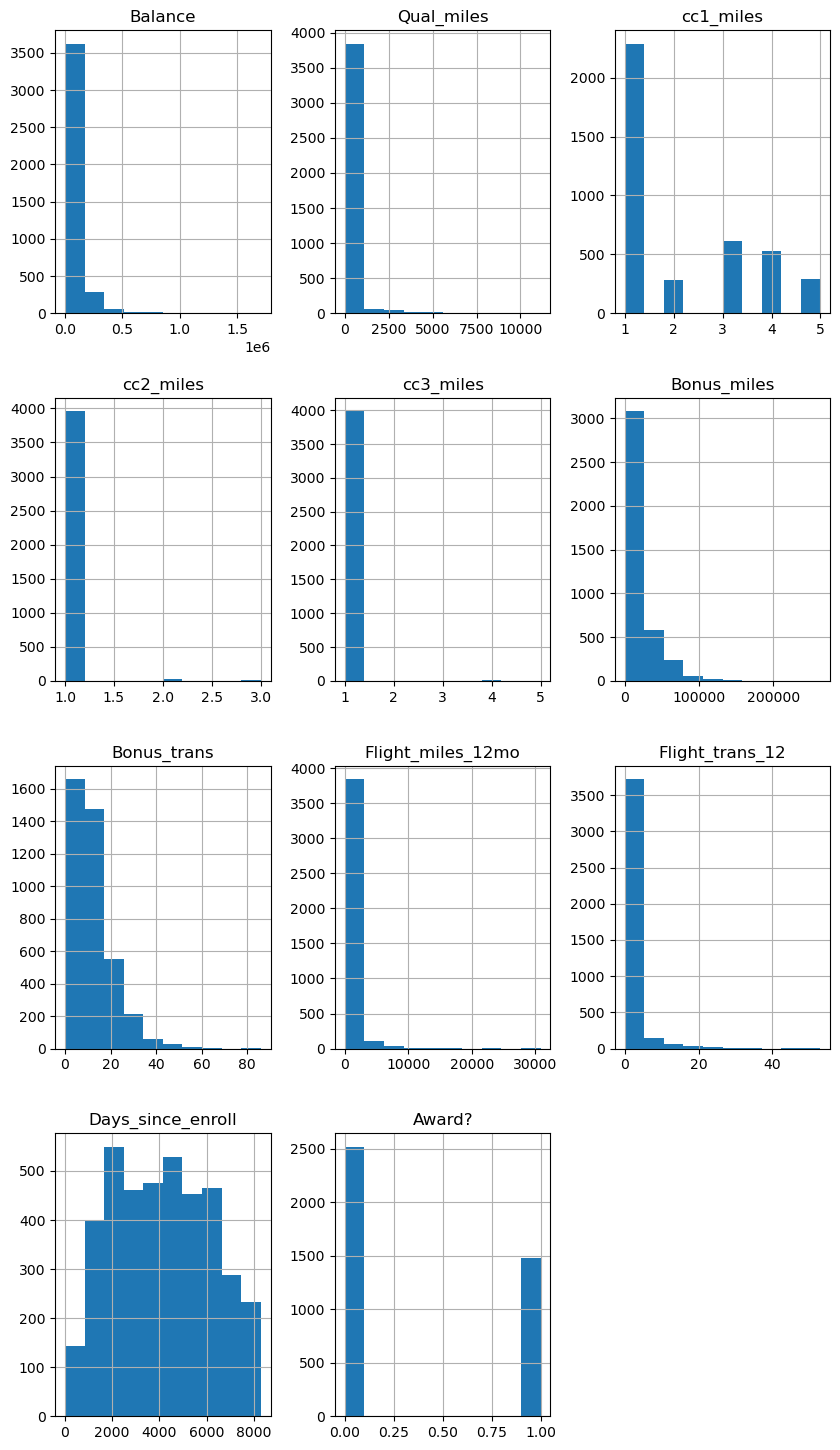

In [173]:
df.hist(figsize=(10, 18))
# sns.pairplot(df)


<Axes: >

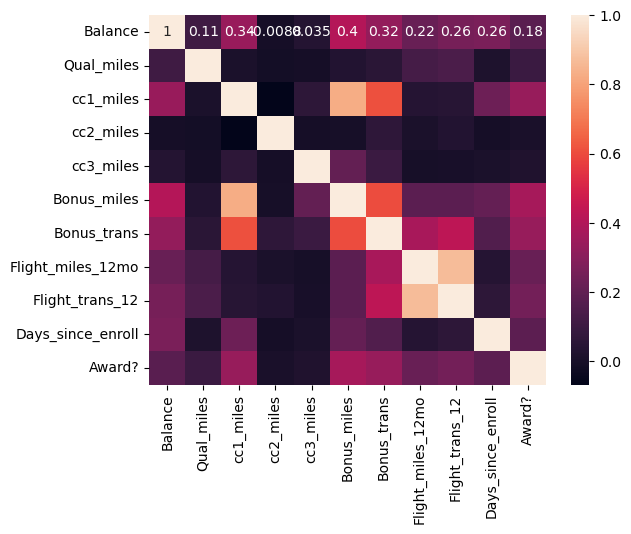

In [174]:
sns.heatmap(df.corr(), annot=True)


In [175]:
# sns.pairplot(df, hue='Award?')

In [176]:
def stand_func(i):
    x=(i-i.mean())/i.std()
    return x

In [177]:
df_norm=stand_func(df.iloc[::])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,-0.451237,-0.186299,-0.769635,-0.098242,-0.062767,-0.702832,-1.104292,-0.328608,-0.362174,1.395060,-0.766976
2,-0.539537,-0.186299,-0.769635,-0.098242,-0.062767,-0.701135,-1.000161,-0.328608,-0.362174,1.379564,-0.766976
3,-0.320152,-0.186299,-0.769635,-0.098242,-0.062767,-0.539329,-0.791898,-0.328608,-0.362174,1.411525,-0.766976
4,-0.583871,-0.186299,-0.769635,-0.098242,-0.062767,-0.689335,-1.104292,-0.328608,-0.362174,1.371816,-0.766976
5,0.239453,-0.186299,1.409030,-0.098242,-0.062767,1.082741,1.498991,1.154577,0.692238,1.363583,1.303496
...,...,...,...,...,...,...,...,...,...,...,...
4017,-0.547158,-0.186299,-0.769635,-0.098242,-0.062767,-0.357071,-0.791898,-0.185788,-0.098571,-1.315341,1.303496
4018,-0.091629,-0.186299,-0.769635,-0.098242,-0.062767,-0.669420,-0.687767,-0.328608,-0.362174,-1.319216,1.303496
4019,-0.000223,-0.186299,0.682808,-0.098242,-0.062767,0.343562,-0.375373,-0.328608,-0.362174,-1.315826,1.303496


In [178]:
np.round(df_norm.describe(),4)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3998.0000,3998.0000,3998.0000,3998.0000,3998.0000,3998.0000,3998.0000,3998.0000,3998.0000,3998.0000,3998.0000
mean,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.7305,-0.1863,-0.7696,-0.0982,-0.0628,-0.7100,-1.2084,-0.3286,-0.3622,-1.9938,-0.7670
25%,-0.5466,-0.1863,-0.7696,-0.0982,-0.0628,-0.6583,-0.8960,-0.3286,-0.3622,-0.8658,-0.7670
50%,-0.3025,-0.1863,-0.7696,-0.0982,-0.0628,-0.4126,0.0412,-0.3286,-0.3622,-0.0105,-0.7670
75%,0.1864,-0.1863,0.6828,-0.0982,-0.0628,0.2758,0.5618,-0.1047,-0.0986,0.8095,1.3035
max,16.1857,14.2213,2.1353,13.4456,20.4222,10.2075,7.7469,21.6778,13.6088,2.0227,1.3035


In [179]:
dm=sch.linkage(df_norm,metric='euclidean',method='complete')

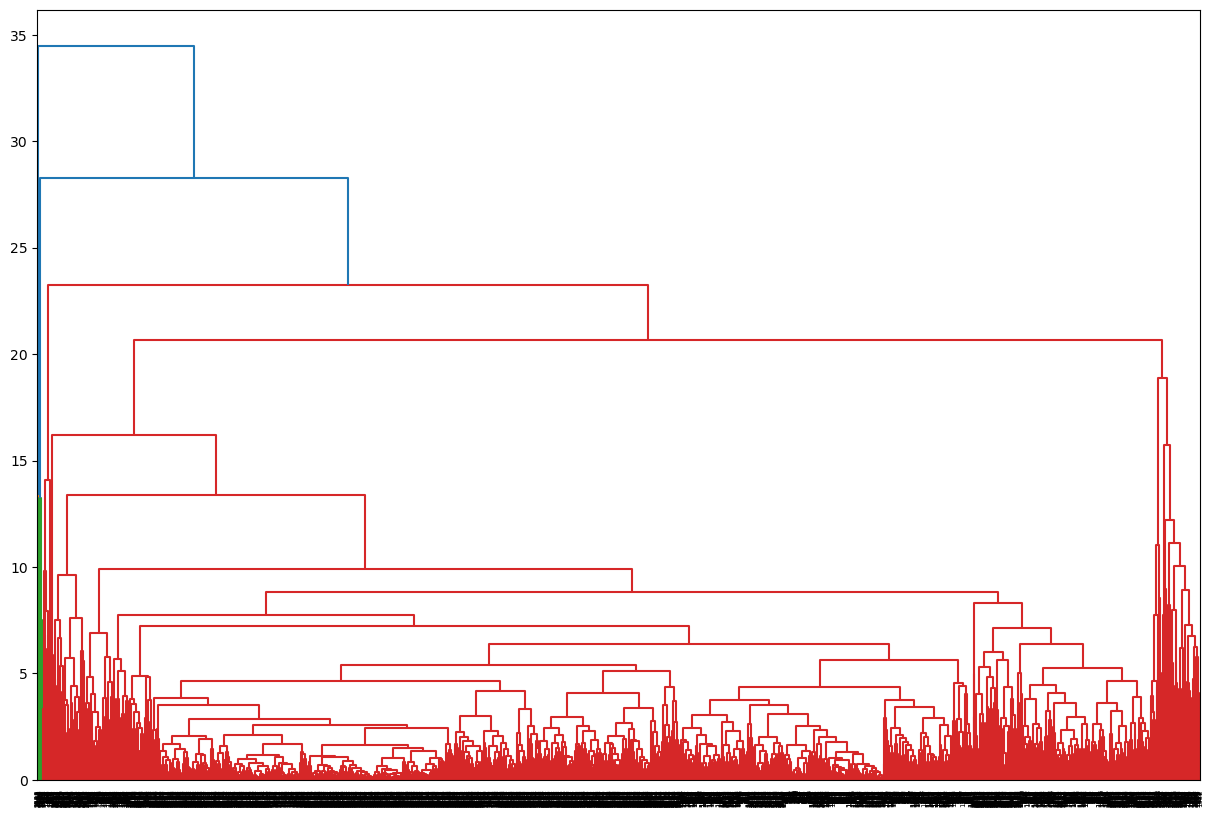

In [180]:
plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(dm)

In [181]:
hc= AgglomerativeClustering(n_clusters=8,metric='euclidean',linkage='complete')
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=8)

In [182]:
hc.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [183]:
df['hc_clusterid']=hc.labels_

In [184]:
df.head(50)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
6,16420,0,1,1,1,0,0,0,0,6942,0,1
7,84914,0,3,1,1,27482,25,0,0,6994,0,1
8,20856,0,1,1,1,5250,4,250,1,6938,1,1
9,443003,0,3,2,1,1753,43,3850,12,6948,1,5


In [185]:
df1=df.sort_values("hc_clusterid")
df1.iloc[:,[0,-1]]

,Balance,hc_clusterid
ID#,,
120,969559,0
44,619393,0
416,620498,0
472,1113394,0
1672,642756,0
...,...,...
194,123516,7
3906,126167,7
385,377252,7


In [186]:
df.iloc[::].groupby(["hc_clusterid"]).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
hc_clusterid,,,,,,,,,,,
0,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143
1,65696.153050,112.362865,2.033422,1.000000,1.000796,15576.801592,10.713528,267.547215,0.809284,4069.224934,0.349072
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,131528.147541,348.180328,2.565574,1.000000,1.000000,37762.426230,29.983607,5375.065574,15.581967,4950.565574,0.803279
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
6,142376.181818,8720.727273,2.181818,1.000000,1.000000,15125.363636,15.454545,1336.454545,4.000000,5349.363636,0.818182
7,180579.200000,0.000000,4.200000,1.000000,1.000000,225128.000000,26.400000,2103.000000,4.800000,4930.800000,1.000000


In [197]:
kmean=KMeans(n_clusters=8)
kmean.fit(df_norm)

C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [199]:
kmean.labels_

array([4, 4, 4, ..., 3, 4, 4])

In [201]:
kmean.inertia_

17362.250876069436

In [224]:
import warnings
warnings.filterwarnings("ignore")
inertia=[]
k=list(range(2,15))
for i in k:
    kc=KMeans(n_clusters=i)
    kc.fit(df_norm)
    inertia.append(kc.inertia_)
    print(i,inertia)

2 [35393.49336161043]
3 [35393.49336161043, 30885.41318157971]
4 [35393.49336161043, 30885.41318157971, 27142.03165595283]
5 [35393.49336161043, 30885.41318157971, 27142.03165595283, 24872.837251827325]
6 [35393.49336161043, 30885.41318157971, 27142.03165595283, 24872.837251827325, 21464.26081790496]
7 [35393.49336161043, 30885.41318157971, 27142.03165595283, 24872.837251827325, 21464.26081790496, 18885.69907476227]
8 [35393.49336161043, 30885.41318157971, 27142.03165595283, 24872.837251827325, 21464.26081790496, 18885.69907476227, 17311.771893346602]
9 [35393.49336161043, 30885.41318157971, 27142.03165595283, 24872.837251827325, 21464.26081790496, 18885.69907476227, 17311.771893346602, 15958.788454701466]
10 [35393.49336161043, 30885.41318157971, 27142.03165595283, 24872.837251827325, 21464.26081790496, 18885.69907476227, 17311.771893346602, 15958.788454701466, 14723.99651273563]
11 [35393.49336161043, 30885.41318157971, 27142.03165595283, 24872.837251827325, 21464.26081790496, 18885.

Text(0, 0.5, 'inertial')

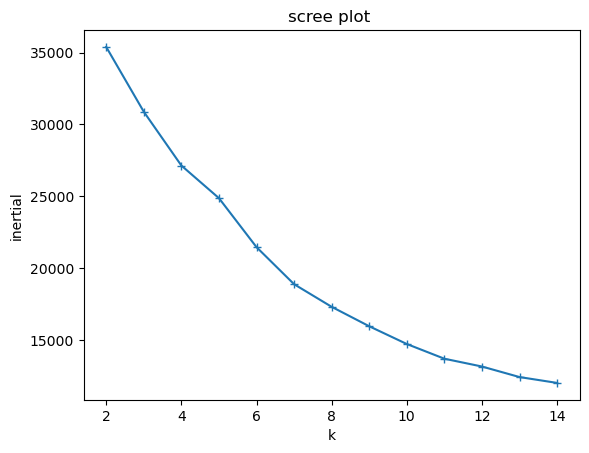

In [225]:
plt.plot(k,inertia,marker='+')
plt.title("scree plot ")
plt.xlabel("k")
plt.ylabel("inertial")

In [227]:
kmeans=KMeans(KMeans=4)
kmeans.fit(df_norm)

KMeans(n_clusters=4)

In [228]:
labels_3=kmeans.labels_
labels_3

array([0, 0, 0, ..., 3, 0, 0])

In [229]:
df['clusterid_new']=labels_3
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid,clusterid_new
ID#,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,3


In [232]:
df.iloc[::].groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,44079.375686,94.312157,1.224314,1.019216,1.000392,4730.429412,6.940000,199.370588,0.622353,3699.088627,0.203137,1.060392
1,1,191266.395349,939.017442,2.180233,1.034884,1.000000,31152.430233,26.494186,5269.436047,15.348837,4678.302326,0.808140,3.122093
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,2.000000
3,3,116542.077716,137.291832,3.716098,1.002379,1.001586,39438.944489,18.811261,331.026963,0.984933,4886.574148,0.647105,1.066614


In [257]:
clusters_new=KMeans(n_clusters=5)
clusters_new.fit(df)

KMeans(n_clusters=5)

In [260]:
labels_4=clusters_new.labels_
labels_4

array([2, 2, 2, ..., 0, 2, 2])

In [262]:
ss_5=silhouette_score(df,labels_4)
ss_5

0.541431800484636

In [263]:
ss_3=silhouette_score(df,labels_3)
ss_3

0.27839450446476155

In [265]:
print(ss_3,ss_5)

0.27839450446476155 0.541431800484636


# Dbscan

In [234]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid,clusterid_new
ID#,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, 1 to 4021
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award?             3998 non-null   int64
 11  hc_clusterid       3998 non-null   int64
 12  clusterid_new      3998 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 421.7 KB


In [236]:
array=df.values
array

array([[28143,     0,     1, ...,     0,     1,     0],
       [19244,     0,     1, ...,     0,     1,     0],
       [41354,     0,     1, ...,     0,     1,     0],
       ...,
       [73597,     0,     3, ...,     1,     1,     3],
       [54899,     0,     1, ...,     0,     1,     0],
       [ 3016,     0,     1, ...,     0,     1,     0]], dtype=int64)

In [240]:
stscaler=StandardScaler()
x=stscaler.fit_transform(array)
x

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -7.67071631e-01, -2.08168428e-01, -7.22510803e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -7.67071631e-01, -2.08168428e-01, -7.22510803e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -7.67071631e-01, -2.08168428e-01, -7.22510803e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
         1.30365921e+00, -2.08168428e-01,  1.45209260e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -7.67071631e-01, -2.08168428e-01, -7.22510803e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -7.67071631e-01, -2.08168428e-01, -7.22510803e-01]])

In [248]:
dbscan=DBSCAN(eps=1,min_samples=13)
labels=pd.Series(dbscan.fit_predict(x)).value_counts()

In [249]:
labels

 0    1906
-1     719
 3     584
 2     437
 1     352
Name: count, dtype: int64

In [250]:
dbscan.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [251]:
df["cluster"]=dbscan.labels_

In [253]:
df.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid,clusterid_new,cluster
ID#,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,-1
6,16420,0,1,1,1,0,0,0,0,6942,0,1,0,0
7,84914,0,3,1,1,27482,25,0,0,6994,0,1,3,1
8,20856,0,1,1,1,5250,4,250,1,6938,1,1,0,2
9,443003,0,3,2,1,1753,43,3850,12,6948,1,5,1,-1


In [255]:
silhouette_score(x,dbscan.labels_)

0.22913258785186633